In [1]:
import os,sys
import pandas as pd
import numpy as np

## Connect to the database

In [18]:
from influxdb import InfluxDBClient, DataFrameClient

host = "localhost"
port = 8086
user = "root"
password = "root"
dbname = "WRSmon"

client = DataFrameClient(host, port, user, password, dbname)

datadict = client.query("SELECT * from CPU")
data = datadict["CPU"]

data.to_csv("output2.csv")

# Playing a bit with the data

## InfluxDB = CPU (WRSmon)

In [2]:
df = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/CPU_database.csv",index_col=0, parse_dates=True)
print(df.shape)
df.tail(4)

/usr/local/lib/python3.5/dist-packages/pandas/core/tools/datetimes.py:314: UserWarning: Discarding nonzero nanoseconds in conversion
  for ts in result]


(135791, 13)


,cpu15min,hostname,wrsDateTAI,wrsMainSystemStatus,wrsNetworkingStatus,wrsOSStatus,wrsPtpDeltaRxM,wrsPtpDeltaRxS,wrsPtpDeltaTxM,wrsPtpDeltaTxS,wrsSoftPLLStatus,wrsSpllMode,wrsTimingStatus
2020-01-09 07:02:13.965396+00:00,NaN,192.168.4.35,1.485461e+09,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
2020-01-09 07:02:15.562155+00:00,NaN,192.168.4.165,1.484441e+09,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
2020-01-09 07:02:20.626120+00:00,12.0,192.168.4.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09 07:02:20.813832+00:00,4.0,192.168.4.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dtypes

cpu15min               float64
hostname                object
wrsDateTAI             float64
wrsMainSystemStatus    float64
wrsNetworkingStatus    float64
wrsOSStatus            float64
wrsPtpDeltaRxM         float64
wrsPtpDeltaRxS         float64
wrsPtpDeltaTxM         float64
wrsPtpDeltaTxS         float64
wrsSoftPLLStatus       float64
wrsSpllMode            float64
wrsTimingStatus        float64
dtype: object

In [4]:
df.index

DatetimeIndex(['2020-01-02 13:18:34.469233+00:00',
               '2020-01-02 13:18:45.215085+00:00',
               '2020-01-02 13:19:29.638589+00:00',
               '2020-01-02 13:19:40.066811+00:00',
               '2020-01-02 13:30:25.018330+00:00',
               '2020-01-02 13:30:35.457173+00:00',
               '2020-01-02 13:30:45.834470+00:00',
               '2020-01-02 13:30:56.176036+00:00',
               '2020-01-02 13:31:06.527432+00:00',
               '2020-01-02 13:31:16.901338+00:00',
               ...
               '2020-01-09 07:01:59.931374+00:00',
               '2020-01-09 07:02:00.076435+00:00',
               '2020-01-09 07:02:00.679099+00:00',
               '2020-01-09 07:02:02.293271+00:00',
               '2020-01-09 07:02:10.286541+00:00',
               '2020-01-09 07:02:10.445312+00:00',
               '2020-01-09 07:02:13.965396+00:00',
               '2020-01-09 07:02:15.562155+00:00',
               '2020-01-09 07:02:20.626120+00:00',
            

In [5]:
# get only data from this specific day 
# (several days would be ['2020-01-07':'2020-01-08'] with inclusive interval borders)
oneday = df.loc['2020-01-08']

In [3]:
# make selection based on hostname
wrs5 = df['hostname'].map(lambda x: x == '192.168.4.35')
wrs6 = df['hostname'].map(lambda x: x == '192.168.4.165')

## InfluxDB = snmp (telegraf)

In [4]:
#snmp = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/snmp_Jan13.csv",index_col=0, parse_dates=True)
snmp = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/snmp_Jan16.csv",index_col=0, parse_dates=True)
print(snmp.shape)
snmp.tail(4)

(1115550, 39)


,agent_host,host,wrsAuxClkSetStatus,wrsBootCnt,wrsBootConfigStatus,wrsBootSuccessful,wrsCPULoadAvg15min,wrsCPULoadAvg1min,wrsCPULoadAvg5min,wrsConfigSource,...,wrsSoftPLLStatus,wrsSpllAlignState,wrsSpllMode,wrsSpllSeqState,wrsTempFPGA,wrsTempPLL,wrsTempPSL,wrsTempPSR,wrsTemperatureWarning,wrsTimingStatus
2020-01-16 07:18:10+00:00,192.168.4.32,haai,1.0,1.0,4.0,2.0,14,8.0,9.0,5.0,...,1.0,0.0,3.0,8.0,39.0,40.0,28.0,30.0,2.0,2.0
2020-01-16 07:18:10+00:00,192.168.4.33,haai,1.0,1.0,4.0,2.0,14,18.0,21.0,5.0,...,1.0,0.0,3.0,8.0,41.0,39.0,28.0,29.0,2.0,2.0
2020-01-16 07:18:10+00:00,192.168.4.34,haai,1.0,1.0,4.0,2.0,17,2.0,17.0,3.0,...,1.0,0.0,3.0,8.0,38.0,37.0,28.0,30.0,2.0,2.0
2020-01-16 07:18:10+00:00,192.168.4.35,haai,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wrs5_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.35')
wrs6_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.165')

# make selection for one variable only (and remove all NaN to make plots look nicer)
cpu5_snmp = snmp[wrs5_snmp]
cpu5_snmp = cpu5_snmp[np.isfinite(cpu5_snmp['wrsCPULoadAvg15min'])]
cpu6_snmp = snmp[wrs6_snmp]
cpu6_snmp = cpu6_snmp[np.isfinite(cpu6_snmp['wrsCPULoadAvg15min'])]

## Plot CPU usage

In [6]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

Plot as time series

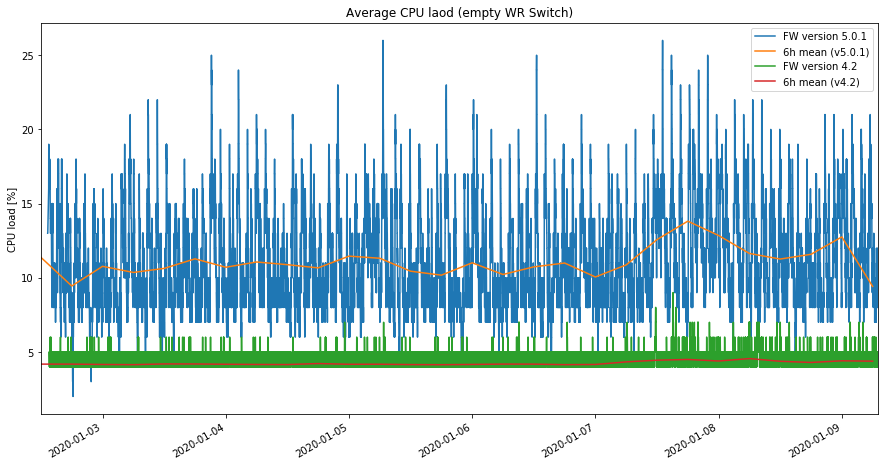

In [7]:
# make selection for one variable only (and remove all NaN to make plots look nicer)
cpu5 = df[wrs5]
cpu5 = cpu5[np.isfinite(cpu5['cpu15min'])]
cpu6 = df[wrs6]
cpu6 = cpu6[np.isfinite(cpu6['cpu15min'])]

ax = cpu5.cpu15min.plot(figsize=(15,8), label='FW version 5.0.1')
ax = cpu5.cpu15min.resample("6h").mean().plot(label="6h mean (v5.0.1)")

ax = cpu6.cpu15min.plot(figsize=(15,8), label='FW version 4.2')
ax = cpu6.cpu15min.resample("6h").mean().plot(label="6h mean (v4.2)")

ax.set_title('Average CPU laod (empty WR Switch)')
ax.set_ylabel('CPU load [%]')
ax.legend()

/usr/local/lib/python3.5/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


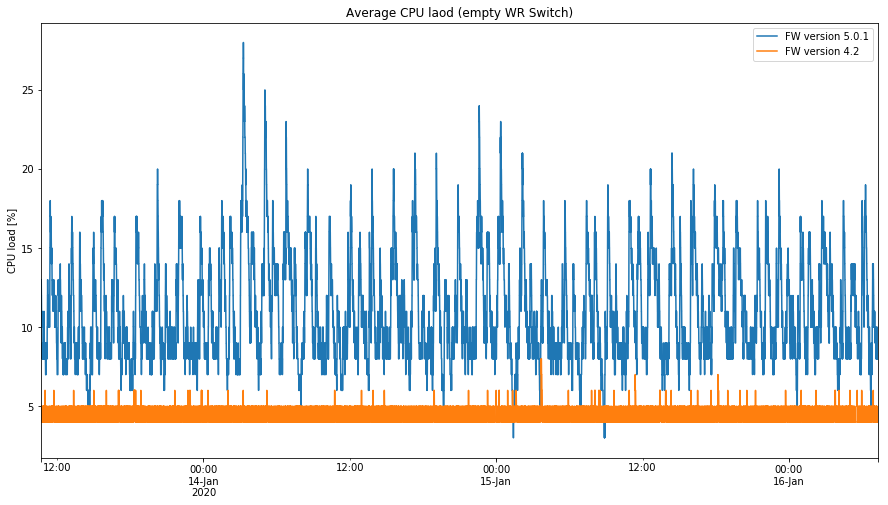

In [8]:
ax = cpu5_snmp.wrsCPULoadAvg15min.plot(figsize=(15,8), label='FW version 5.0.1')
#ax = cpu5.cpu15min.resample("6h").mean().plot(label="6h mean (v5.0.1)")
ax = cpu6_snmp.wrsCPULoadAvg15min.plot(figsize=(15,8), label='FW version 4.2')
#ax = cpu6.cpu15min.resample("6h").mean().plot(label="6h mean (v4.2)")

ax.set_title('Average CPU laod (empty WR Switch)')
ax.set_ylabel('CPU load [%]')
ax.legend()

11.132549019607843 10.0
4.240893611710378 4.0


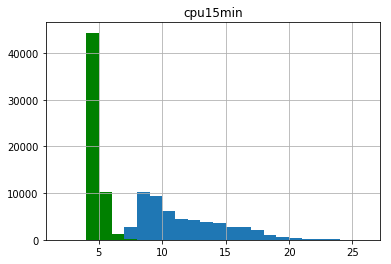

In [9]:
ax = df[wrs5].hist(column='cpu15min',bins=24)
df[wrs6].hist(column='cpu15min',color='green',bins=5,ax=ax)
print(cpu5.cpu15min.mean(),cpu5.cpu15min.median())
print(cpu6.cpu15min.mean(),cpu6.cpu15min.median())

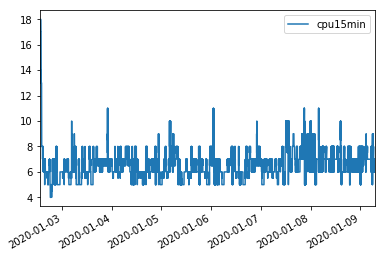

In [10]:
df[["cpu15min"]].rolling("1h").median().plot()

Plot with cuts on time range

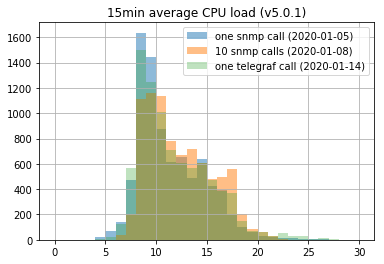

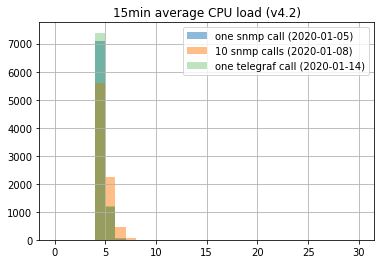

In [24]:
# remember that during 2020-01-07 we switched from 1 snmp call to ~13 snmp calls
ax = df[wrs5].loc['2020-01-05':'2020-01-05'].hist(column='cpu15min',bins=30, range=(0,30), alpha=0.5, label='one snmp call (2020-01-05)')
df[wrs5].loc['2020-01-08':'2020-01-08'].hist(column='cpu15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='10 snmp calls (2020-01-08)')
snmp[wrs5_snmp].loc['2020-01-14':'2020-01-14'].hist(column='wrsCPULoadAvg15min',bins=30, range=(0,30), ax=ax, alpha=0.3, label='one telegraf call (2020-01-14)')

plt.title('15min average CPU load (v5.0.1)')
plt.legend()

#histtype='step'
ax = df[wrs6].loc['2020-01-05':'2020-01-05'].hist(column='cpu15min',bins=30, range=(0,30), alpha=0.5, linewidth=3, label='one snmp call (2020-01-05)')
df[wrs6].loc['2020-01-08':'2020-01-08'].hist(column='cpu15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='10 snmp calls (2020-01-08)', linewidth=3)
snmp[wrs6_snmp].loc['2020-01-14':'2020-01-14'].hist(column='wrsCPULoadAvg15min',bins=30, range=(0,30), ax=ax, alpha=0.3, label='one telegraf call (2020-01-14)')

# get current axis to draw some text in
#plt.gca().text(0.1, 0.9, "test", transform=plt.gca().transAxes)
plt.title('15min average CPU load (v4.2)')
plt.legend()